## Modules

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

import cv2

import warnings
warnings.filterwarnings('ignore')

## Initialize the dataframe

In [2]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [4]:
single_image = X_train[0]
single_image.shape

(28, 28)

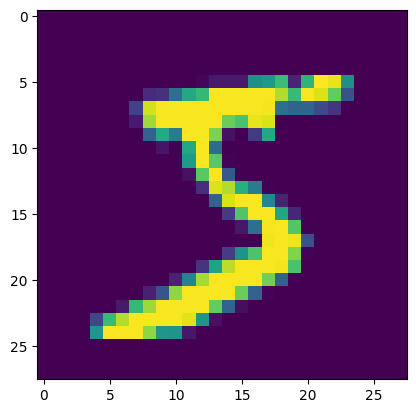

In [5]:
plt.imshow(single_image)

In [6]:
y_train[0]

5

## Data Preprocessing

In [7]:
y_cat = to_categorical(y_train)
y_cat.shape

(60000, 10)

In [8]:
y_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [9]:
y_cat_test = to_categorical(y_test, num_classes=10)
y_cat_train = to_categorical(y_train, num_classes=10)

#### Scaling each data into 0 to 1

In [10]:
X_train = X_train / 255
X_test = X_test / 255

In [11]:
scaled_image = X_train[0]
scaled_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

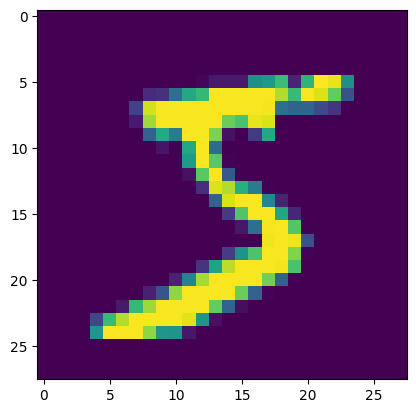

In [12]:
plt.imshow(scaled_image)

In [13]:
X_train.shape

(60000, 28, 28)

In [14]:
X_train = X_train.reshape(60000, 28, 28, 1)
# batcH_size, width, height, color_channels

In [15]:
X_test = X_test.reshape(10000, 28, 28, 1)

## Model Training

In [16]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4, 4), 
                 input_shape=(28, 28, 1), activation='relu'))


model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))
# softmax for multiclass prob

model.compile(loss='categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])

In [17]:
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [18]:
model.fit(X_train, y_cat_train, epochs=10, 
          validation_data=(X_test, y_cat_test),
         callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 43s 22ms/step - loss: 0.1408 - accuracy: 0.9571 - val_loss: 0.0607 - val_accuracy: 0.9797
Epoch 2/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0475 - accuracy: 0.9858 - val_loss: 0.0381 - val_accuracy: 0.9867
Epoch 3/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0300 - accuracy: 0.9905 - val_loss: 0.0370 - val_accuracy: 0.9870
Epoch 4/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0203 - accuracy: 0.9933 - val_loss: 0.0325 - val_accuracy: 0.9890
Epoch 5/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0144 - accuracy: 0.9951 - val_loss: 0.0387 - val_accuracy: 0.9880


In [19]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.140777,0.957083,0.060662,0.9797
1,0.047486,0.985850,0.038060,0.9867
2,0.030046,0.990450,0.036967,0.9870
3,0.020320,0.993267,0.032533,0.9890
4,0.014432,0.995050,0.038731,0.9880


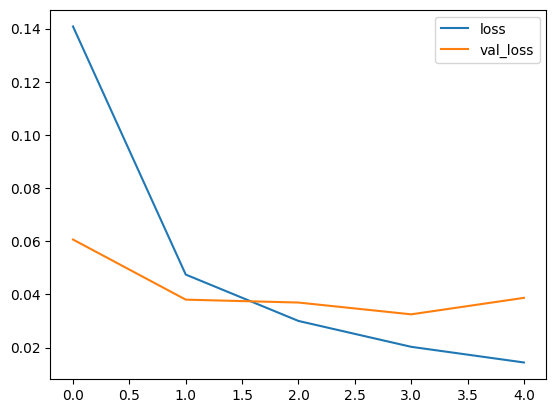

In [20]:
metrics[['loss', 'val_loss']].plot()
plt.show()

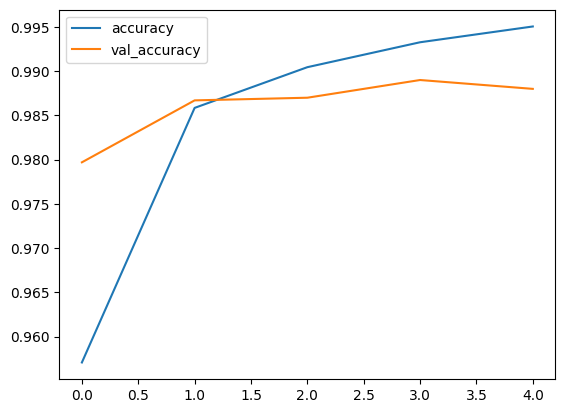

In [21]:
metrics[['accuracy', 'val_accuracy']].plot()
plt.show()

In [22]:
model.metrics_names

['loss', 'accuracy']

In [23]:
model.evaluate(X_test, y_cat_test, verbose=True)

313/313 [==============================] - 2s 6ms/step - loss: 0.0387 - accuracy: 0.9880


[0.03873121365904808, 0.9879999756813049]

In [24]:
model.evaluate(X_train, y_cat, verbose=True)

1875/1875 [==============================] - 11s 6ms/step - loss: 0.0098 - accuracy: 0.9971


[0.009811191819608212, 0.9971333146095276]

In [38]:
predict = model.predict(X_test) 
predict_class = np.argmax(predict, axis=1)

313/313 [==============================] - 2s 6ms/step


In [39]:
predict_class, predict_class.shape

(array([7, 2, 1, ..., 4, 5, 6], dtype=int64), (10000,))

In [41]:
y_test, y_test.shape

(array([7, 2, 1, ..., 4, 5, 6], dtype=uint8), (10000,))

In [42]:
print(classification_report(y_test, predict_class))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.97      0.99      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [43]:
confusion_matrix(y_test, predict_class)

array([[ 974,    0,    2,    0,    0,    0,    2,    0,    1,    1],
       [   0, 1130,    0,    1,    0,    1,    1,    1,    1,    0],
       [   1,    2, 1013,    1,    0,    0,    4,    2,    9,    0],
       [   0,    0,    2, 1000,    0,    2,    0,    3,    3,    0],
       [   1,    0,    1,    0,  967,    0,    2,    0,    2,    9],
       [   1,    0,    1,    5,    0,  882,    1,    0,    2,    0],
       [   4,    3,    0,    0,    1,    1,  946,    0,    3,    0],
       [   0,    0,   12,    0,    0,    0,    0, 1011,    1,    4],
       [   2,    0,    2,    1,    0,    0,    0,    0,  968,    1],
       [   1,    1,    0,    0,    4,    3,    0,    4,    7,  989]],
      dtype=int64)

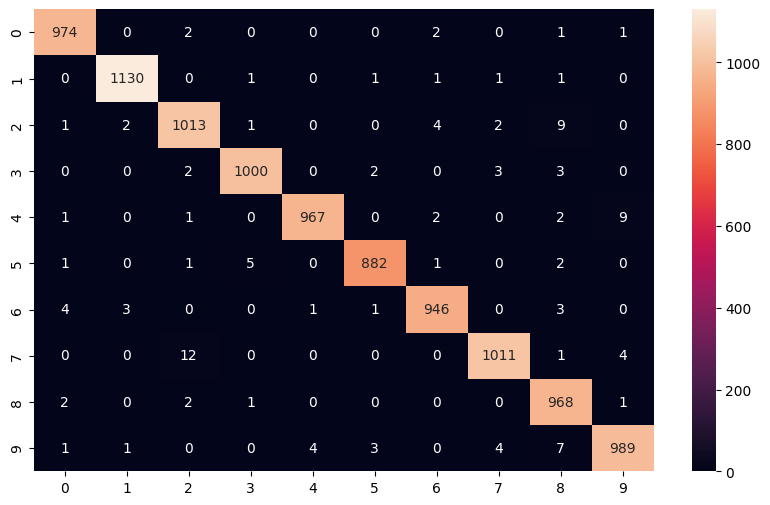

In [51]:
plt.figure(figsize=(10, 6))

sns.heatmap(confusion_matrix(y_test, predict_class), annot=True, fmt='.0f')
plt.show()

## Testing the model on real image

In [80]:
predict = model.predict(X_test[1].reshape(1, 28, 28, 1)) 
predict_class = np.argmax(predict, axis=1)

predict_class

1/1 [==============================] - 0s 30ms/step


array([2], dtype=int64)